# <center>FAIRNESS IN CLASSIFICATION PROBLEM</center>



$ \hspace{50mm}\text{Sandeep Kumar Ramani} $ $ \hspace{50mm} \text{Bastin Joseph}$
<br>
$ \hspace{50mm}\text{ ramani4@wisc.edu} $    $ \hspace{55mm} \text{bjoseph5@wisc.edu}$ 

$ \hspace{100mm}\text{Sreeranjani Didugu}$
<br>
$ \hspace{100mm}\text{didugu@wisc.edu}$

---

## 1 Abstract 


Fairness in data-driven machine learning model approach have raised concerns about its potential unfairness towards certain social groups. For instance, during data collection process humans can be highly biased towards a particular gender/race that would lead to unequal treatment or outcomes for different social groups. Leaving this problem unattended could hurt particular minority groups of people sharing one or more sensitive attributes and could direct the users to much more biased decisions. In this project, we introduce a notion to train a fair SVM binary classifier which maximizes the margin subject to a additional fairness constraints during the training process,i.e.,

$$minimize \quad ||w||_2^2 +  C \sum_{i = 1}^n\xi_i$$

$$subject \: to  \: \quad |Cov(z,d_{w}(x))| < c ,\quad y_iw^Tx_i \ge 1- \xi_i$$

where $\xi_i$ in $C \sum_{i = 1}^n\xi_i$ is the hinge loss and C is the penalty term, z is the set of biased features, $d_{w}(x)$ is the signed distance from the feature vectors to the decision boundary which should be smaller than the covariance threshold c to ensure fairness in the model. In addition, we also discuss trade-off between fairness and accuracy of the model.

## Learning Objective: 

    1) Understand the various causes of bias in machine learning system.
    2) Introduce a new type of fairness regularizer and learn it effects.
    3) Implement the fair classifier using SVMs and analyze the model.
    4) Analyze the tradeoff between fairness and accuracy.


# 2 Review of SVM

## 2.1 Introduction to SVM

## 2.1.2 What is Support Vector Machine ?

Support Vector Machine is one of the famous supervised machine learning algorithm used for classification tasks. The SVM algorithm, all it does in nutshell is, given a n-dimensional data vector it classifies which class it belongs to by using a learnt hyperplane/decision-boundary through examples we provide. 


## 2.1.3  What is the goal of the Support Vector Machine (SVM)?

<i>The goal of a support vector machine is to find the optimal separating hyperplane which maximizes the margin of the training data.</i>[1]

Before finding the optimal separating hyperplane lets refresh what is a hyperplane.
<br>
### 2.1.3.1 Hyperplane
<br>
In case of a 2-dimensional data which has two classes in case of binary classification, a line will linearly separate them if the data are linearly separable as shown in the Figure 1, similary for n-dimensional space we define a hyperplane which is an N -1 dimensional subspace that separates the data. A hyperplane is defined as, 


$$w_{0} + w_{1}*x_1 + w_{2}*x_2 + ... + w_{n-1}*x_n-1 + w_{n}*x_n= 0 $$


For a 2-dimensional space, the hyperplane, which is the line is defined by, $w_{0} + w_{1}*x_1 + w_{2}*x_2 = 0 $ and the points above this line satifies $w_{0} + w_{1}*x_1 + w_{2}*x_2 > 0$ and points below this line satifies $w_{0} + w_{1}*x_1 + w_{2}*x_2 < 0 $.





Consider a binary classification problem, as you can see below there are infinity many possible separating line between the two classes 

<img src="https://github.com/sand47/images-/blob/master/a.jpg?raw=true" width="500"> 
<br>
$$\text{Figure 1 adapted from [1]} $$

Let's see how the SVM algorithm learns this optimal separating hyperplane using the concept of support vectors and margin in the below section. 

<img src="https://github.com/sand47/images-/blob/master/b.jpg?raw=true" width="500"> 
<br>
$$\text{Figure 2 adapted  from [1]} $$


## 2.2 How does SVM work?

Let's us consider a binary classification problem, with two class been represented with different colors green and pink. If we are supposed to draw a decision boundary, by our intuition we tend to draw it in the center of the empty space between the data points. The way in which we find the decision boundary in SVM is to find a decision boundary that is farthest from closest data point. The distance from the decision boundary to the nearest sample is called as $\textbf{margin}$ [2]. Before we find the margin lets define our input,weights and lables.
<br> <br>




The input features x along with the constant which is used to shift the hyperplane away from the origin is defined below

$$ \text {Feature} \:  x^T=[\tilde x^T \quad 1]   $$   

We will also define our classifier weights w and decompose those into $\tilde w$ and a constant $w_0$ which is associated with the offset in the features.
<br><br>
$$\text {Weights} \: w^T=[\tilde w^T \quad w_0]$$
<br>
We choose labels,
$$\text {Labels} \: \hat{y}=sign(x^Tw)$$   
That is,

\begin{equation}
  \hat{y}=\begin{cases}
   \hspace{3mm} 1, & \text{$\tilde x^T\tilde w+w_0 > 0$}.\\
    -1, & \text{$\tilde x^T\tilde w+w_0 < 0 $}.
  \end{cases}
\end{equation}




## 2.3 All vs Difficult data points ?

Next, its very initutive to think that the hyperplane or the decision boundary equation is learned and depends on the training examples, for example, in linear regression and neural network all the data points are used in the learning process but what if we can learn the optimal hyperplane by just learning only the difficult points close to the decision boundary? Yes, that's where support vector machine comes in i.e. the separating hyperplane is learned only through closest point to the separating hyperplane with the objective of maximum margin which we will discuss in a moment.

## 2.4 Finding Margin 

The derivation of margin is taken from Professor Barry Van Veen’s video lecture on ’Support Vector Machines for Classification’ [1].

The green line (given by $\tilde x^T\tilde w = 1$) and pink line (given by $\tilde x^T\tilde w = -1$ ) in the Figure 3 contains training samples closest to the decision boundary and these samples are called the support vectors and these elements decides the location of the hyperplane $[3]$. Let's assign label -1 when $\tilde x^T\tilde w +w_0\leq-1$ and a label of 1 when its $\tilde x^T\tilde w+w_0\geq1$. The decision boundary then, splits the middle of those two boundaries so that is $\tilde x^T\tilde w+w_0=0$.





$$label \: "-1" \: (green):\:  \tilde x^T \tilde w+w_0\leq-1$$    
$$label \:  "+1" \: (pink): \:  \tilde x^T\tilde w+w_0\geq1$$   
$$decision \: boundary \: (blue): \:  \tilde x^T\tilde w+w_0=0$$

Given that the hyperplane pass through the closest data point i.e. the green line and pink line in the Figure 3, we can compute the margin by dividing the distance between these two lines by two.Also remember that there will be no points inside the margin and it will void space.
<br>

We measure the distance in the direction perpendicular to the boundary and so the unit normal to this boundary plane vector is denoted as 'v' in Figure 3. The boundary $\tilde x^T\tilde w=0$ implies that its set of vectors orthogonal to $\tilde w$ thus  vector orthogonal to the boundary is given by any vector in the direction of $\tilde w$.  
 \
We defined the unit normal to the boundary plane as,
$$v=\frac{\tilde {w}}{||\tilde w||_2}$$ 


Let us consider two points $\ \tilde x_0$ and $\ \tilde x_1$ on the two boundaries as shown in Figure 3 then margin is half of the distance between these two points, that is

<img src="https://github.com/sand47/images-/blob/master/c.jpg?raw=true" width="500"> 
<br>
$$\text{Figure 3 adapted  from [1]} $$
<br><br>

$$m=\frac{1}{2}||\tilde {x}_1-\tilde {x}_0||_2$$ 
The distance between $x_1$ and $x_0$ is 2m in the direction orthogonal to the decision boundary(along v). Or we can also say we have to go a distance of 2m from $x_0$ to $x_1$ in the direction of v
 $$\Rightarrow \tilde {x}_1- \tilde {x}_0=2mv $$
 $$ \hspace{2.5cm} \Rightarrow \tilde {x}_1=\tilde {x}_0+2mv, \hspace{3cm} (1)$$  
 We know that $\tilde {x}_1$ is a point on the boundary $\tilde {x}^T\tilde w+w_0=1$   
 $$\Rightarrow    \tilde {x}_1^T \tilde w+w_0=1$$   
 Substituting equation (1) in the above equation we get,
 $$\tilde {x}_0^T\tilde w+2m\frac{\tilde {w}^T}{||\tilde w||_2}\tilde w+w_0=1$$    
 We know that $\tilde {x}_0$ is on the boundary $\tilde {x}^T \tilde w+w_0=-1$  
$$\Rightarrow  \tilde {x}_0^T \tilde w+w_0=-1$$  
$$2m\frac{\tilde w^T}{||\tilde w||_2}\tilde w=2$$    
$$\Rightarrow m=||\tilde {w}||_2^{-1} $$

Therefore, the margin is determined by $||\tilde w||_2^{-1}$  .


<img src="https://github.com/sand47/images-/blob/master/d.jpg?raw=true" width="500"> 
<br>
$$\text{Figure 4 adapted  from [1]} $$

Thus our objective function from which we aim to learn the optimal hyperplane weights is defined as 
$$min \:    ||\tilde w||_2^2 \: $$ 
<br>
$$\quad \quad \quad \quad \quad \quad \text{such that} : y_i(\tilde{x}_i\tilde w+w_0)\geq1$$

i.e, we maximize the marigin subject to correct classification and as defined earlier the margin is determined by $||\tilde w||_2^{-1}$ so instead of maximizing the inverse we will minimize the $||\tilde w||_2^2$, which in turn maximize the margin.

## 2.5 Hinge loss 

From the class we learned that SVM address non-linearly separable cases by using hinge loss for binary classification. Hinge loss is most commenly used for "maximum-margin" classification for support vector machines.The hinge loss is defined as $\xi_i$ or $ \ell(y) = \max(0, 1-y \cdot f(x) )$.$[4]$, it gives zero if its correctly classified if not the loss linearly increase with $1-y \cdot f(x)$ where y is the true label and f(x) is the predicted output.

<img src="https://github.com/sand47/images-/blob/master/hinge.png?raw=true" width="500"> 
<br>
$$\text{Figure 5 taken from [13]}$$



## 2.6 Signifance of penalty term 


Now we need to come up with a idea to associate a misclassification penalty so that the model correctly classifies this point. For this, consider a non-linearly separable data set and a new variable "C" which is a penalty term. The bigger the value of C, the more penalty SVM gets when it makes misclassification and thus the margin becomes narrower [15].Thus our new optimization problem with this additional penalty to hinge loss is defined as, 

$$\text{minimize} \quad ||w||_2^2 + C \sum_{i = 1}^n\xi_i$$
$$\text{subject to} \quad  y_i(\tilde w_T x_i + b) ≥ 1 − \xi_i  \hspace{1mm} and \hspace{1mm}  \xi_i≥ 0 $$


where $\xi$ is the hinge loss and its always positive $\xi$  >=0, $||w||^2$
corresponds to the margin between the support vectors, and $C\sum_{i=1}^{n}\xi_i$ penalizes the number of data points falling inside the margin as mentioned in the work by Muhammad Bilal Zafar paper "Fairness Constraints: Mechanisms for Fair Classification" [7]


Thus, if a data point is misclassified that is if the margin is less than one then we would increase the loss by term Cξi which aims to move the hyperplane to classify the point correctly. 


# 3 Types of Bias

In most of the case, data generations and collection process are managed by humans and they are susceptible to various kind of bias which are discussed below. When building machine learning models, it's important to be aware of common human biases so that we can avoid them. [6]



## 3.1.1 Reporting Bias
It occurs when the data does not captures the real truth data well and training the model with this incomplete data leads to reporting bias. 

#### Example:

1. Consider a police record dataset, if the police record only contains older crimes and if they do not update the dataset with new crimes, the machine learing model would recommend the police to go to older places where the crime is less likely to happen.Thus we need to have updated dataset containing all the new crime scenes so that it predict correctly.





## 3.1.2 Selection Bias

Conducting wrong experiments during data collection process leads to selections bias where the data collected data does not match real-distribution it was intended to capture. 

#### Example: 
For example, say we want to study the effects of students who study at late nights on certain health problem. You collect health information from students of your class who work at late nights and from people who do not work at late night. If we train the machine learning model on this you might conclude that people who work at night work are associated with an increase health issues.
<br><br>
The problem with this apporach is that the two groups under study may have different reason for health issues. The people whom you collected data who worked at night might have different health issue which was not disclosed during the data collection process or due to their lower socioeconomic status they might be linked to less healthy diets which might affect their health. So your finding may not be related to health issues by working at night at all, but a reflection of the influence of socioeconomic status.



## 3.1.3 Other than bias in data

We often blame our explanation of machine learnings bias to biased training data. The reality is different, bias can even come from even before we started collecting data,. There are three key stages which includes bias.
    
1. Framing the problem - "what if the underlying objective has a bias?"
2. Collecting the data - "what if the collected data is imbalanced or does not cover all different types of scenario?"
3. Preparing the data - "what if we select only creatin attributes which we feel the model should learn?"
 

# 3.2 Motivation for fairness regularization

The main reason for coming up with this additional fairness regularization is that due to various bias which we studied above. We usually have a sensitive feature that is causing us the problem of unfair classification on the output label thus the minority group is always given false prediction. Thus we need come up with new constraints which makes SVM learn properly and give us fair machine learning model and one way to achieve this mathematically is by reducing the covariance between the sensitive feature and the hyperplane we aim to learn from the data and remove the effect of sensitive feature so that we learn optimal weights for hyperplane.

The following section is from  by Muhammad Bilal Zafar paper "Fairness Constraints: Mechanisms for Fair Classification" [7] which uses the idea of adding the covariance constraints into optimization problem. 



## 3.2.1 Decision Boundary Covariance

Thus our covariance between our sensitive feature ${z_i}$ i=1 to N and the hyperplane( $d_w$(xi) i=1 to N ) is defined as 

$$
 Cov(z,d_w(x)) = E[(z-\bar{z})d_w(x)] - E[(z-\bar{z})]\bar{d_w(x)}                
$$ 
$$
\approx \frac{1}{N}\sum_{n=1}^{N}(z-\bar{z})d_w(x) 
$$

where $E[(z-\bar{z})]\bar{d_w(x)}$ cancels out since $E[(z-\bar{z})]$ is 0 and since $d_w(x)$ is $w^Tx =0$ the above equation reduces to $\frac{1}{N}\sum_{n=1}^{N}(z-\bar{z})w^Tx$

We then add this term as a additonal constraints to our objective function which we aim to minimize

## 3.2.2  Maximizing Fairness Under Fairness Constraints

Finally, we combine all we learned above and find our optimal weights w for decision boundary by learning our new optimization problem defined below


$\quad minimize \quad ||w||_2^2 + C \sum_{i = 1}^n\xi_i$



$
\quad subject \hspace{2mm} to \quad y_iw^Tx_i \ge 1- \xi_i
$


$
\quad \quad  \quad \quad \quad \quad \xi_i \geq 0 \hspace{2mm} \xi_i, ∀i ∈ {1, . . . , n}
$

$
\quad \quad  \quad \quad \quad \quad   \frac{1}{N}\sum_{n=1}^{N}(z-\bar{z})d_w(xi)  <c
$
<br>
$
\quad \quad  \quad \quad \quad \quad \frac{1}{N} \sum_{n=1}^{N}(z-\bar{z})d_w(xi)  \geq-c
$  

 

where c is the covariance threshold, which specifies an upper bound on the covariance between each sensitive attribute and the signed distance from the feature vectors to the decision boundary, $\xi_i$ is the hinge loss.


# 4 Optional Section 

#### Please note that you can skip this section as it's not a part of the project work but we thought it would nice we throw some light on evaluation model in general as it very useful to know the which single performance metric can  be choosen for classification problem for various problem types. 


### 4.1 Evaluation of Model 

The accuracy metric is one of the most commenly used performance metric for classification problem and this is a very good metric when the test set is well balanced. Let’s consider a binary classification problem with almost equal number of samples belonging to each class and randomly predicting a class by tossing a coin or assigning all samples to one class would give an accuracy of ~50% in this case. This is considered bad and there is a lot of room to improve using a learnt model.(this section is partially adapted from [11] and [12])

But let’s an another case where around 95% of the samples belong to class 1 and rest 5% belong to class 0. In this case if we predict all class to be class 1 without any model, we still have an accuracy of 95%. So, accuracy is not a good metric for classification models when the dataset is not balanced. In many real-world problems this is the case and thus we need to come up different performance metric. For this we use 2x2 matrix called confusion matrix, as defined below 

| TP | FN |
| --- | --- |
| FP | TN |

The 4 terms TP, FP, FN and TN are interpreted as follows:

•	TP – True Positive: The actual label is positive, and the model predicted positive

•	FP – False Positive: The actual label is negative, and the model predicted positive

•	FN – False Negative: The actual label is positive, and the model predicted negative

•	TN – True Positive: The actual label is negative, and the model predicted negative

We can now use the above elements of the confusion matrix to define evaluation metrics which can used to find performance of the model for classification problems.

**Accuracy**

Accuracy in terms of confusion matrix elements is defined as below

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$

**Precision**

It says , of all the samples predicted positive, how many were actually positive

$$Precision = \frac{TP}{TP+FP}$$

**Recall/True Positive Rate (TPR)**

It says , of all the positive sample how much we classified correctly

$$Recall = \frac{TP}{TP+FN}$$


**F1-score**

Having a single metric for performance would be easier for analysis and thus combine precision and recall using the harmonic mean because harmonic mean will trend toward the minimum of precision and recall. 

$$F1score = \frac{2*Precision*Recall}{Precision+Recall}$$

The above 3 metrics (Precision, Recall and F1score) helps to measure how well the model is able to classify positive predictions.

**FP Rate (False Positive Rate)**

It says how often a negative sample is classified incorrectly. This is very important when the dataset is not balanced
$$FP Rate = \frac{FP}{FP+TN}$$


As we can see from above a good model will have a high TPR and low FPR.
The below diagram (Fig 5)shows a sample curve where we plot FPR and TPR on x and y axes respectively. This is called a ROC curve.
So our desired point in this curve is marked in red in the diagram (with low FPR and high TPR)

<img src="https://github.com/sand47/images-/blob/master/ROC.JPG?raw=true" width="300"> 
<br>
$$\text{Figure 5 taken from [12]}$$


# 5 Reference: 


[1] Professor Barry Van Veen’s video lecture on ’Support Vector Machines for Classification’

[2] SVM: The linearly separable case https://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html

[3] An Idiot’s guide to Support vector machines (SVMs) by R. Berwick http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

[4] C19 Machine learning course by A. Zisserman http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf Pg. 29

[5] Constrained Optimization and Support Vector Machines by Man-Wai MAK,The Hong Kong Polytechnic University    http://www.eie.polyu.edu.hk/~mwmak/EIE6207/ContOpt-SVM-beamer.pdf Pg 26

[6] Types of Bias  https://developers.google.com/machine-learning/crash-course/fairness/types-of-bias

[7] Fairness Constraints: Mechanisms for Fair Classification https://arxiv.org/pdf/1507.05259.pdf

[8] Adult Income dataset https://www.kaggle.com/wenruliu/adult-income-dataset

[9] Fairness in Logisitic regression  https://github.com/mbilalzafar/fair-classification

[10] SVM gradient decent https://github.com/nikhil-seth/ML-Models-from-scratch 

[11] Confusion Matrix https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

[12] Confusion Matrix https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a

[13] Hinge loss https://math.stackexchange.com/questions/782586/how-do-you-minimize-hinge-loss

[14] Scikit learn https://scikit-learn.org/stable/index.html

[15] Significance of Penalty term https://stats.stackexchange.com/questions/31066/what-is-theinfluence-of-c-in-svms-with-linear-kernel  

# 6 Warm up Questions 

## 6.1 Warm Up 1 

1) In the below graph circle those points which you think will affect the hyperplane. 

<img src="https://github.com/sand47/images-/blob/master/svm1.PNG?raw=true" width="500"> 
 

2) The point that lies farthest to the hyperplane are called as support vector <br> <br>
a) False <br>
b) True <br>


## 6.2  Warm Up 2

$1)$Find the covariance between feature $X_1$ and $X_2$ each contain n sample point? How will that be used to find correlation between the features? Hint: The correlation coefficient that indicates the strength of the relationship between two variables 
<br> <br> 
$2)$ Using the idea from 1), if we find the correlation between all the features in a dataset containing say 4 features we would get a correlation matrix. What useful insights can we interpret from the matrix? Hint: if the correlation is high , those feature are highly correlated. 

$3)$ "If the test data distribution is different from training data distribution, the model performance on the test set will not be affected since the model is generalized on training set." Is the above statement is,<br>

a) True <br>
b) False <br>




# 7 Main Activity 

## 7.1  Activity 1 

Having understood the theory and intuition behind using penaltly term lets see them in effect. 

$1)$  How will you find the best C parameter for given dataset and which performace metric will you consider for finding the optimal C value?


$2)$  What did you observe by varying the C paramter in the below code? Will the model generalize to new data points for large C ? Vary the cluster standard deviation value so that its no longer linearly separable do you think SVM will be effective? 



# Coding section 

For example purpose we are using scikit learn inbuild make_blob function for generating data [14] 

C:\Users\rsand\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rsand\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


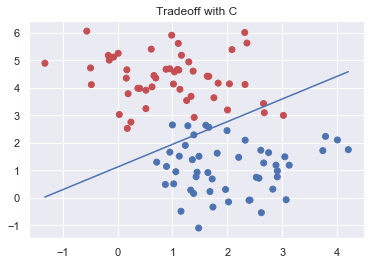

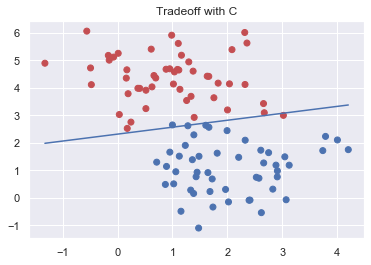

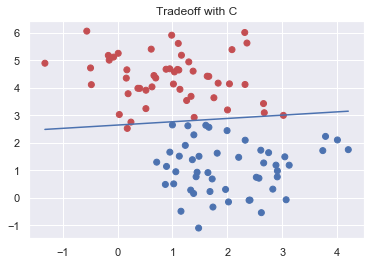

In [7]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.svm import LinearSVC
# number of data points 
num = 100

# change the standard deviation
std = 0.9  

x_train, y_train = make_blobs(n_samples=num, centers=2,
                  random_state=0, cluster_std=std)

def plot(svm,x_train,y_train):
    x = np.linspace(min(x_train[:, 0]), max(x_train[:, 0]), 20)
    ys = (-svm.intercept_ - svm.coef_[0][0]*x)/svm.coef_[0][1]
    fig, ax = plt.subplots()
    ax.scatter(x_train[:, 0], x_train[:, 1], color=["r" if y == 0 else "b" for y in y_train])
    ax.plot(x, ys)
    ax.set_title("Tradeoff with C")

C = [0.1,10,100]
for c in C:
    # Make and fit my SVM with low `C`
    svm = LinearSVC(loss="hinge", C=c)
    svm.fit(x_train,y_train )
    plot(svm,x_train,y_train)


$ 3)$ When the C parameter is set to infinite and zero, what will happen to the hyperplane? Comment on misclassification rate.<br> 

    
$ 4)$ So far we have seen only binary classification problem, do you think we can extend SVM to multi-class classification? Explain  your approach briefly. 

##### End of Activity 

### Biased dataset

Let's consider a adult income dataset containing 14 features with target as Income which is divide into two classes: <=50K and >50K. An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. $[8]$

We can explore the possibility in predicting income level based on the individual’s personal information and we consider gender/sex to be the sensitive feature for our analysis.


## 7.2  Activity 2 

$1)$ How does accuracy and the covariance between sensitive feature and decision boundary vary if we include the gamma and fairness constraint respectively? 

$2)$ How does varying gamma impact the classification accuracy w.r.t on sensitive feature ?

$3)$ In this approch, we choose the sensitive attribute before training the model. Do you think is it possible to predict before hand which attribute/feature is sensitive? 

### Important Note:

It might take significant computation time if we train using entire training data in local computer, thus depending on your hardware please change the load_data_size variable below between 5,000 to 10,000 with maximum value of 31000.

### The following code is a modifed version of the original code [9] from authors Muhammad Bilal Zafar "Fairness Constraints: Mechanisms for Fair Classification" where they have implemented logistic regression and we try to modify that for support vector machine and we have used their code for data preprocessing (API in datapreprocess.py) and we also use other utility functions from utils.py and loss_function.py from [9] to present the fairness constrained model . We adapt the utility funcitons of the reference code as such to get the constraints and preprocess the data set. The SVM without fairness is implemented using modifed version of [10] were we have  included both the penalty term and lambha term.


##  SVM without fairness

In [1]:
from SVM_scratch import *
from datapreprocess import *
from helper import *
import numpy as np
import loss_function as lf

preprocess = Datapreprocess()

#initial value 
epoch =None
lr = None
gamma = None
lamb = None
max_iter = None
# Number of training data
dataSize = 25000

#Load Adult Data
X, y, val = preprocess.read_data(dataSize)

#split data for testing and training 

train_fold_size = 0.8
x_train, y_train, x_control_train, x_test, y_test, x_control_test = preprocess.train_test_split(X, y, val, train_fold_size)

   

In [2]:
def classifier(apply_fairness_constraints,loss_function,c,sensitive_attrs,max_iter=1000,epoch=50,lamb=1,lr=0.1,C=1,gamma=None):
    svm =SVM()
    w = svm.training(x_train,y_train, x_control_train, loss_function,C,max_iter,lamb,epoch,lr, apply_fairness_constraints, sensitive_attrs, c,gamma)
    train_score, test_score, correct_answers_train, correct_answers_test = ut.check_accuracy(w, x_train, y_train, x_test, y_test, None, None)
    distances_hyperplane_test = (np.dot(x_test, w)).tolist()
    all_class_labels_assigned_test = np.sign(distances_hyperplane_test)
    correlation_test_dict = ut.get_correlations(None, None, all_class_labels_assigned_test, x_control_test, sensitive_attrs)
    cov_dict_test = ut.print_covariance_sensitive_attrs(None, x_test, distances_hyperplane_test, x_control_test, sensitive_attrs)
    ut.print_classifier_fairness_stats([test_score],correlation_test_dict, [cov_dict_test], sensitive_attrs[0])


In [3]:
# Unconstrained SVM

print ("== Unconstrained (original) classifier ==")
# all constraint flags are set to 0 since we want to train an unconstrained (original) classifier
apply_fairness_constraints = 0
loss_function = lf._hinge_loss
sensitive_attrs = ["sex"]
c = {} # covariance threshold 
C = 1 # penalty term 
epoch = 100 # number of epochs 
lamb = 1 # lambda 
lr = 0.1  # learning rate 
classifier(apply_fairness_constraints,loss_function,c,sensitive_attrs,max_iter,epoch,lamb,lr,C,gamma)

== Unconstrained (original) classifier ==
Train Default model
weight dims 51
Model Predictions
Train Done
Accuracy: 0.75
Protected/non-protected in +ve class: 8% / 14%
Covariance between sensitive feature and decision from distance boundary : 225.992


## SVM with fairness constraints
Here the gamma variable act as a tradeoff between accuracy and fairness.

In [4]:
""" Now classify such that we optimize for fairness """
apply_fairness_constraints = 1 # set this flag to one since we want to optimize accuracy subject to fairness constraints
loss_function = lf._hinge_loss
sensitive_attrs = ["sex"]
c = {"sex":0} # covariance threshold
print ("== Classifier with fairness constraint ==")
C = 1
# gamma controls how much loss in accuracy we are willing to incur to achieve fairness 
# increase in gamma decrease the accuracy to a certain limit. 
gamma = 0.1
max_iter = 10000
classifier(apply_fairness_constraints,loss_function,c,sensitive_attrs,max_iter,epoch,lr,C,lamb,gamma)


== Classifier with fairness constraint ==
running Custom model
weight dims 51
Model Predictions
Train Done
Accuracy: 0.25
Protected/non-protected in +ve class: 99% / 99%
Covariance between sensitive feature and decision from distance boundary : 0.017


In [5]:
""" Now classify such that we optimize for fairness """
apply_fairness_constraints = 1 # set this flag to one since we want to optimize accuracy subject to fairness constraints
loss_function = lf._hinge_loss
sensitive_attrs = ["sex"]
c = {"sex":0}
print ("== Classifier with fairness constraint ==")
C = 0.1
# gamma controls how much loss in accuracy we are willing to incur to achieve fairness 
# increase in gamma decrease the accuracy to a certain limit. 
gamma = 0
max_iter = 10000
classifier(apply_fairness_constraints,loss_function,c,sensitive_attrs,max_iter,epoch,lr,C,lamb,gamma)


== Classifier with fairness constraint ==
running Custom model
weight dims 51
Model Predictions
Train Done
Accuracy: 0.75
Protected/non-protected in +ve class: 13% / 20%
Covariance between sensitive feature and decision from distance boundary : 0.012


# 8 Appendix: Solutions

## 8.1 Warm Up 1: 

1) These points examples are positioned such that removing any one of them introduces error and they are closest to hyperlane and thus affect the position of hyperplane. 

<img src="https://github.com/sand47/images-/blob/master/answer.PNG?raw=true" width="500"> 
2) False, support vector are the data point which is closest to the hyperplane not the farthest point.


## 8.2 Warm Up 2: 

1) The covariance between $X_1$ and $X_2$ is $ Cov(X_1,X_2) = E[(X_1 -\tilde X_1)*(X_2 - \tilde X_2)]$ and the correlation is $ \frac{cov(X_1,X_2)}  {S_{x_1}*S_{x_2}}$  where $S_{x_1}$ and $S_{x_2}$ is the standard deviation of $X_1$ and $X_2$. 

2) From the correlation matrix, we find if the features are linear correlated or not. The correlation values lies between 0 and 1, with value of 1 meaning highly correlated and 0 meaning not correlated. Thus we can remove these features from the dataset depending on the nature of it and also they used to summarize and observe patterns in a large data set.

3) False, even though the model is generalized to training set distribution well it need not generalize to data whose distribution is different from the training set. Thus we should make sure our training set contain all kind of situation. 


## 8.3 Activity 1: 

1) We can use cross validation approach to find the best C value and we can use the accuracy metric which tell us how much correct classification we obtained and we can choose the C which gives us the highest accuracy. 

2) For large C value, the margin becomes low as it assigned with high penalty and thus for new data points close to decision boundary have the possibilty of mis-classification. 

3) For large values of C, the penalty for misclassifying points is very high, so the decision boundary will perfectly separate the data if possible.For near zero value of C, the penalty is very low, so the decision boundary will not perfectly separate the data if possible.


4) We can extend the binary classification to multi-classification by use the concept of one Vs all.Assume you have N different classes. One vs all will train one classifier per class in total N classifiers. For class i it will assume i-labels as positive and the rest as negative. This often leads to imbalanced datasets meaning generic SVM might not work, but still there are some workarounds.Also apart from SVM which we learnt in class there are other classifier which does multi-classification which you can find here https://scikit-learn.org/stable/modules/multiclass.html 

## 8.4 Activity 2:

1) As we introduce the fairness term the covariance between the sensitive feature and the decision boundary is decreased and by varying the gamma it is observed that increase in gamma decrease the accuracy. 

2) As we increase the gamma, the fairness increases.

3) No, in real-world there might be two or more senstitive feature which might affect the model and also due to privacy reason these data are not visible. Thus without much of prior knowledge and statisitics of data it sometime hards to fix the sensitive feature. 